In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import glob
from scipy.stats import ttest_ind, mannwhitneyu
import scipy.stats as stats
from scipy.stats import wilcoxon

In [5]:
#TODO: CHANGE PROLIFIC ID TO UID

In [2]:
conditions = ["baseline", "explanation"]

nag_files = [glob.glob(f"/home/nicola/Game/logs/{p}/*nags.csv") for p in conditions]
nag_files = [file for sublist in nag_files for file in sublist]
nag_df = pd.concat([
    pd.read_csv(fp)
    .assign(GROUP=fp.split('/')[5]) 
    .assign(ID=Path(fp).stem.split('_')[0]) 
    for fp in nag_files
], ignore_index=True)


q1_files = [glob.glob(f"/home/nicola/Game/logs/{p}/*questionnaire1.csv") for p in conditions]
q1_files = [file for sublist in q1_files for file in sublist]
q1_df = pd.concat([
    pd.read_csv(fp)
    .assign(GROUP=fp.split('/')[5]) 
    .assign(ID=Path(fp).stem.split('_')[0]) 
    for fp in q1_files
], ignore_index=True)
q1_df


q2_files = [glob.glob(f"/home/nicola/Game/logs/{p}/*questionnaire2.csv") for p in conditions]
q2_files = [file for sublist in q2_files for file in sublist]
q2_df = pd.concat([
    pd.read_csv(fp)
    .assign(GROUP=fp.split('/')[5]) 
    .assign(ID=Path(fp).stem.split('_')[0]) 
    for fp in q2_files
], ignore_index=True)


q3_files = [glob.glob(f"/home/nicola/Game/logs/{p}/*questionnaire3.csv") for p in conditions]
q3_files = [file for sublist in q3_files for file in sublist]
q3_df = pd.concat([
    pd.read_csv(fp)
    .assign(GROUP=fp.split('/')[5]) 
    .assign(ID=Path(fp).stem.split('_')[0]) 
    for fp in q3_files
], ignore_index=True)

nag_df

,1,2,3,4,5,6,7,8,9,GROUP,ID
0,9,10,10,10,10,10,9,9,10,baseline,5e87a6ee14560f0d57e1f984
1,6,6,6,7,5,5,6,5,5,baseline,602af15577ccb71f741bef0b
2,7,7,7,7,2,4,6,7,7,baseline,6511f1490c9df9f8c7890e
3,2,2,3,3,1,4,6,4,4,baseline,65f04571d48174aefd2817d0
4,6,2,7,9,1,2,2,2,2,baseline,6081728972120aa7f9685791
5,10,10,10,10,10,10,10,10,10,baseline,67dfff57b122d76b85f37e17
6,9,9,8,9,6,7,8,8,9,baseline,5f6c8c79d4da200436bf03f7
7,7,7,8,8,1,7,8,10,9,baseline,67d8270aba9f1c19f16caa6c
8,9,9,9,10,5,9,9,4,4,baseline,613cb52db0f1cb2262bbf5d
9,7,8,10,10,1,6,7,7,6,baseline,614deecf67f2c8ccfe3df23b


In [113]:
# grouped = nag_df.groupby('GROUP')

# for name, group in grouped:
#     ndf = group.T.drop(['ID', 'GROUP'], axis=0)
    
#     avg = ndf.mean(axis=1)
#     std_dev = ndf.std(axis=1)
#     fig, ax = plt.subplots(figsize=(10, 5))
#     plt.errorbar(avg.index, avg, yerr=std_dev, fmt='-o', color='blue', ecolor='red', capsize=4)
    
#     plt.xlabel("Nag score)")
#     plt.ylabel("Nag count")
#     plt.title(f"Average nag score ({name})")
    
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
    
#     nag_df

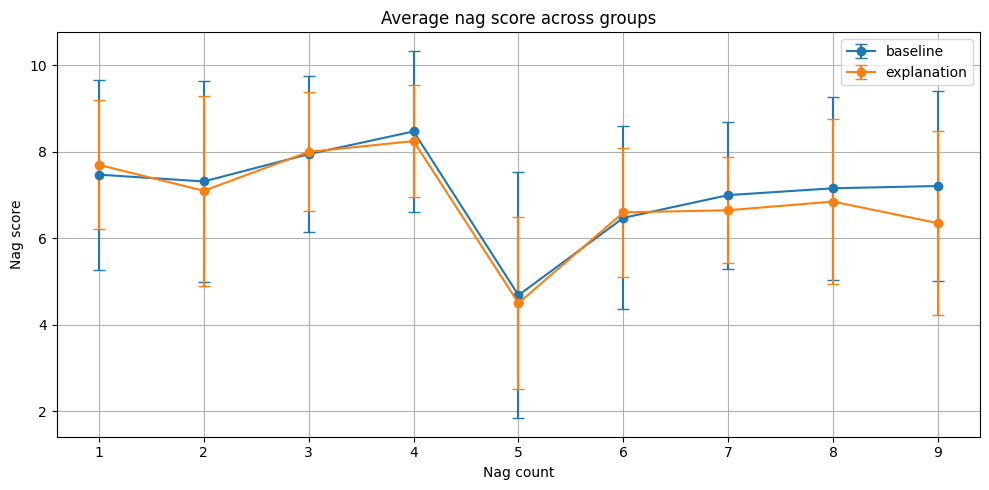

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

grouped = nag_df.groupby('GROUP')

for name, group in grouped:
    ndf = group.T.drop(['ID', 'GROUP'], axis=0)
    
    avg = ndf.mean(axis=1)
    std_dev = ndf.std(axis=1)
    
    ax.errorbar(avg.index, avg, yerr=std_dev, fmt='-o', label=f'{name}', capsize=4)

ax.set_xlabel("Nag count")
ax.set_ylabel("Nag score")
ax.set_title("Average nag score across groups")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


                    2         3     4         5    6         7         8  \
GROUP                                                                      
baseline    -0.157895  0.473684  1.00 -2.789474 -1.0 -0.473684 -0.315789   
explanation -0.600000  0.300000  0.55 -3.200000 -1.1 -1.050000 -0.850000   

                    9  
GROUP                  
baseline    -0.263158  
explanation -1.350000  


<Figure size 1000x600 with 0 Axes>

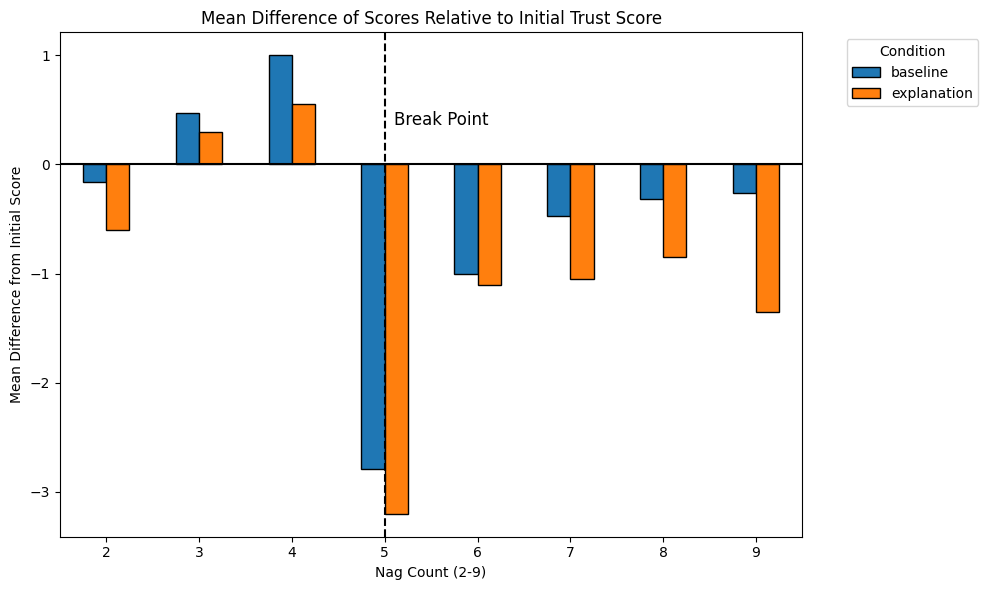

In [4]:
#plot diff from first score, so  +/- something

score_cols = [str(i) for i in range(1, 10)]

nag_df[score_cols] = nag_df[score_cols].apply(pd.to_numeric)

# whats the differences from column '1'
differences = nag_df[score_cols[1:]].subtract(nag_df['1'], axis=0)

grouped_means = differences.join(nag_df['GROUP']).groupby('GROUP').mean()

print(grouped_means)

plt.figure(figsize=(10, 6))
grouped_means.T.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.axvline(x=3, color='black', linestyle='--', linewidth=1.5)
plt.text(3.1, plt.ylim()[1] * 0.3, 'Break Point', color='black', fontsize=12, rotation=0)

plt.xlabel('Nag Count (2-9)')
plt.ylabel('Mean Difference from Initial Score')
plt.title('Mean Difference of Scores Relative to Initial Trust Score')
plt.xticks(rotation=0)
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



     1   2   3   4   5   6   7   8   9
0    9  10  10  10  10  10   9   9  10
1    6   6   6   7   5   5   6   5   5
2    7   7   7   7   2   4   6   7   7
3    2   2   3   3   1   4   6   4   4
4    6   2   7   9   1   2   2   2   2
5   10  10  10  10  10  10  10  10  10
6    9   9   8   9   6   7   8   8   9
7    7   7   8   8   1   7   8  10   9
8    9   9   9  10   5   9   9   4   4
9    7   8  10  10   1   6   7   7   6
10   7   6   7   8   2   5   6   7   7
11  10  10  10  10   7   8   7   8   8
12  10   8  10  10   4   4   7   8   8
13   7   8   8   9   5   7   7   8   9
14   7   7   8  10   7   7   8   9   9
15   9   9   7   7   5   8   8   9   9
16   8   8   9  10   7   6   7   7   7
17   3   5   6   6   6   7   6   7   7
18   9   8   8   8   4   7   6   7   7
19   7   7   8   8   6   7   8   6   7
20   5   1   7   7   4   6   5   4   4
21  10  10  10  10   4   6   8   9  10
22   8   7   8   9   4   3   5   7   3
23   7   3   5   5   2   6   6   6   5
24   8   9  10   9   4   

<Figure size 1000x600 with 0 Axes>

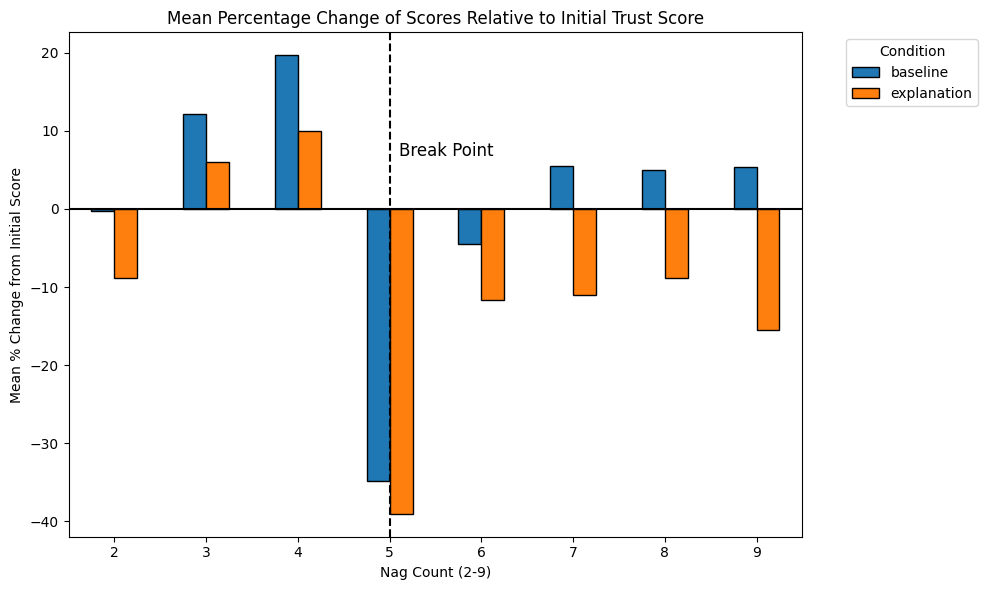

In [9]:
#% change of baseline, then average that % change

score_cols = [str(i) for i in range(1, 10)]
nag_df[score_cols] = nag_df[score_cols].apply(pd.to_numeric)

print(nag_df[score_cols])
# Compute percentage change from baseline (column '1')
percentage_changes = nag_df[score_cols[1:]].subtract(nag_df['1'], axis=0).div(nag_df['1'], axis=0) * 100

# Group by 'GROUP' and compute the mean percentage change
grouped_means = percentage_changes.join(nag_df['GROUP']).groupby('GROUP').mean()

print(grouped_means)

# Plot
plt.figure(figsize=(10, 6))
grouped_means.T.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.axvline(x=3, color='black', linestyle='--', linewidth=1.5)
plt.text(3.1, plt.ylim()[1] * 0.3, 'Break Point', color='black', fontsize=12, rotation=0)

plt.xlabel('Nag Count (2-9)')
plt.ylabel('Mean % Change from Initial Score')
plt.title('Mean Percentage Change of Scores Relative to Initial Trust Score')
plt.xticks(rotation=0)
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [154]:
#only two groups so t-test

score_cols = [str(i) for i in range(2, 10)]
nag_df[score_cols] = nag_df[score_cols].apply(pd.to_numeric)
differences = nag_df[score_cols].subtract(nag_df['1'], axis=0)
differences['GROUP'] = nag_df['GROUP']
differences['mean_difference'] = differences[score_cols].mean(axis=1)

group_labels = differences['GROUP'].unique()
group1 = differences[differences['GROUP'] == group_labels[0]]['mean_difference']
group2 = differences[differences['GROUP'] == group_labels[1]]['mean_difference']

# Perform Welch’s t-test (independent samples t-test with unequal variance)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  

# Print results
print(f"T-test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The difference between the two groups is statistically significant.")
else:
    print("No significant difference between the two groups.")


T-test Results: t-statistic = 1.052, p-value = 0.300
No significant difference between the two groups.


#### Difference between q2 and q3 (Schaefer)

In [12]:
# Function to remove percentage values
def clean_percentages(df):
    df = df.copy()
    for col in df.columns[:-2]:  # Exclude last two columns (e.g., 'ID' and 'GROUP')
        df[col] = df[col].astype(str).str.replace('%', '', regex=True).astype(int)
    return df

q2_df = clean_percentages(q2_df)
q3_df = clean_percentages(q3_df)


In [13]:
#reverse coded items: 9, 11, 14
q2_df[["9", "11", "14"]] = 100 - q2_df[["9", "11", "14"]]
q3_df[["9", "11", "14"]] = 100 - q3_df[["9", "11", "14"]]

# q3_df

In [15]:
q2_grouped = q2_df.groupby('GROUP')
q3_grouped = q3_df.groupby('GROUP')


for name, group in q2_grouped:
    print("-------------------")
    print(f"Group: {name}")

    q3 = q3_df[q3_df['GROUP'] == name]

    q2_sorted = group.sort_values("ID").set_index("ID")
    q3_sorted = q3.sort_values("ID").set_index("ID")

    diff = q2_sorted.iloc[:, :-1] - q3_sorted.iloc[:, :-1]  
    diff["Avg_Difference"] = diff.mean(axis=1)  

    print(diff)


-------------------
Group: baseline
                           1   2   3   4   5   6   7   8   9  10  11  12  13  \
ID                                                                             
5acb4b2ffa3b4e000173aa2c -70 -60 -60 -60 -60 -80 -70 -60 -60 -50 -70 -40 -50   
5c41f9ce4fe4f800016dfaac   0   0   0   0   0   0   0   0   0   0 -10   0   0   
5e60f63ee6385a000bcbffc9  10  10  10  20  20  20  20  20  10 -20   0  20  10   
5e87a6ee14560f0d57e1f984   0   0   0   0  10   0  10   0   0 -10 -10 -10 -10   
5f6c8c79d4da200436bf03f7  10  20  20  20  20  20  20  30  20  30  20  10   0   
602af15577ccb71f741bef0b  20  30  20  70  50  30 -30  10 -10 -60 -10  60 -50   
6081728972120aa7f9685791  20  40  50  60  60  30  10  20  70  50  80   0 -50   
6139eee41ad43c4931bda1ad -20   0 -10 -10 -30 -10   0   0 -10 -20   0 -10   0   
613ab0960ff3efd039adf1e0  20   0  20   0 -10  20  30  20  10  20  50   0  10   
613cb52db0f1cb2262bbf5d   50  30  40  50  50  30  30  40  50   0  40 -10 -10   
614d

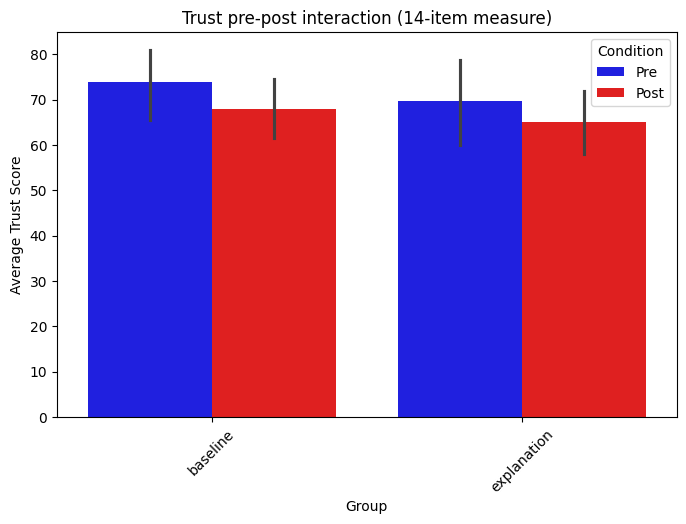

In [16]:
q2_df["Trust Score"] = q2_df.loc[:, [c for c in q2_df.columns if c not in ["GROUP", "ID"]]].mean(axis=1)
q3_df["Trust Score"] = q3_df.loc[:, [c for c in q3_df.columns if c not in ["GROUP", "ID"]]].mean(axis=1)

q2_df["Condition"] = "Pre"
q3_df["Condition"] = "Post"

combined_df = pd.concat([q2_df, q3_df])

plt.figure(figsize=(8, 5))
sns.barplot(data=combined_df, x="GROUP", y="Trust Score", hue="Condition", palette=["blue", "red"])

plt.xlabel("Group")
plt.ylabel("Average Trust Score")
plt.title("Trust pre-post interaction (14-item measure)")
plt.xticks(rotation=45)
plt.legend(title="Condition")

plt.show()


             Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  Q2_8  Q2_9  Q2_10  \
GROUP                                                                      
baseline     73.5  78.5  75.5  73.0  72.5  80.5  79.5  78.5  73.5   71.0   
explanation  74.0  75.0  77.5  73.0  71.5  79.0  77.0  75.5  66.0   67.5   

             Q2_11  Q2_12  Q2_13  Q2_14  
GROUP                                    
baseline      71.0   76.0   69.0   73.5  
explanation   63.0   61.0   54.0   68.0  
             Q3_1   Q3_2  Q3_3  Q3_4  Q3_5  Q3_6  Q3_7  Q3_8  Q3_9  Q3_10  \
GROUP                                                                       
baseline     69.0  67.05  63.1  58.0  64.5  70.5  76.0  65.0  62.5   81.0   
explanation  70.5  62.00  60.5  61.0  60.5  68.5  66.5  63.0  58.5   65.5   

             Q3_11  Q3_12  Q3_13  Q3_14  
GROUP                                    
baseline      64.0   75.5   76.0   59.0  
explanation   68.5   67.5   68.5   66.5  


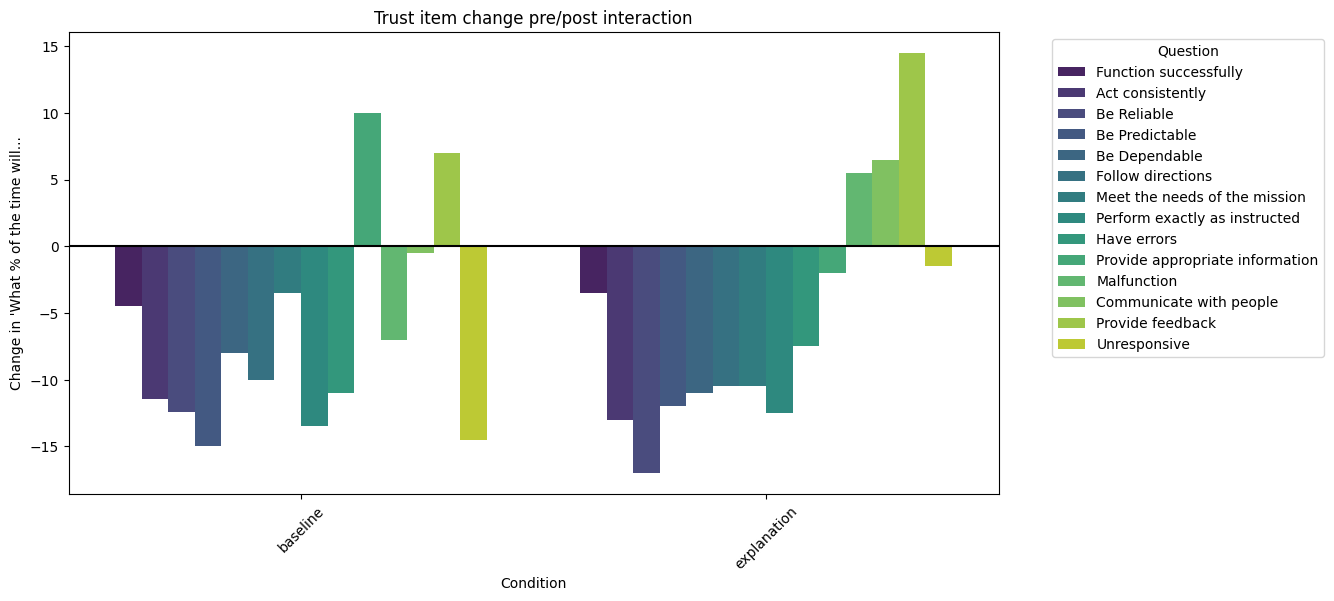

In [20]:
question_labels = {
    "1": "Function successfully",
    "2": "Act consistently",
    "3": "Be Reliable",
    "4": "Be Predictable",
    "5": "Be Dependable",
    "6": "Follow directions",
    "7": "Meet the needs of the mission",
    "8": "Perform exactly as instructed",
    "9": "Have errors",
    "10": "Provide appropriate information",
    "11": "Malfunction",
    "12": "Communicate with people",
    "13": "Provide feedback",
    "14": "Unresponsive"
}

# Select 1-14
questions = [str(i) for i in range(1, 15)]  

# Compute mean per GROUP for Q2 (pre) and Q3 (post)
q2_means = q2_df.groupby("GROUP")[questions].mean().rename(columns=lambda x: f"Q2_{x}")
q3_means = q3_df.groupby("GROUP")[questions].mean().rename(columns=lambda x: f"Q3_{x}")

print(q2_means)
print(q3_means)

comparison_df = pd.concat([q2_means, q3_means], axis=1)
for q in questions:
    comparison_df[f"Change_{q}"] = comparison_df[f"Q3_{q}"] - comparison_df[f"Q2_{q}"]

melted_df = comparison_df.reset_index().melt(id_vars="GROUP", 
                                              value_vars=[f"Change_{q}" for q in questions],
                                              var_name="Question", 
                                              value_name="Change")

melted_df["Question"] = melted_df["Question"].str.replace("Change_", "").map(question_labels)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="GROUP", y="Change", hue="Question", palette="viridis")

plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

plt.xlabel("Condition")
plt.ylabel("Change in 'What % of the time will...")
plt.title("Trust item change pre/post interaction")
plt.xticks(rotation=45)
plt.legend(title="Question", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


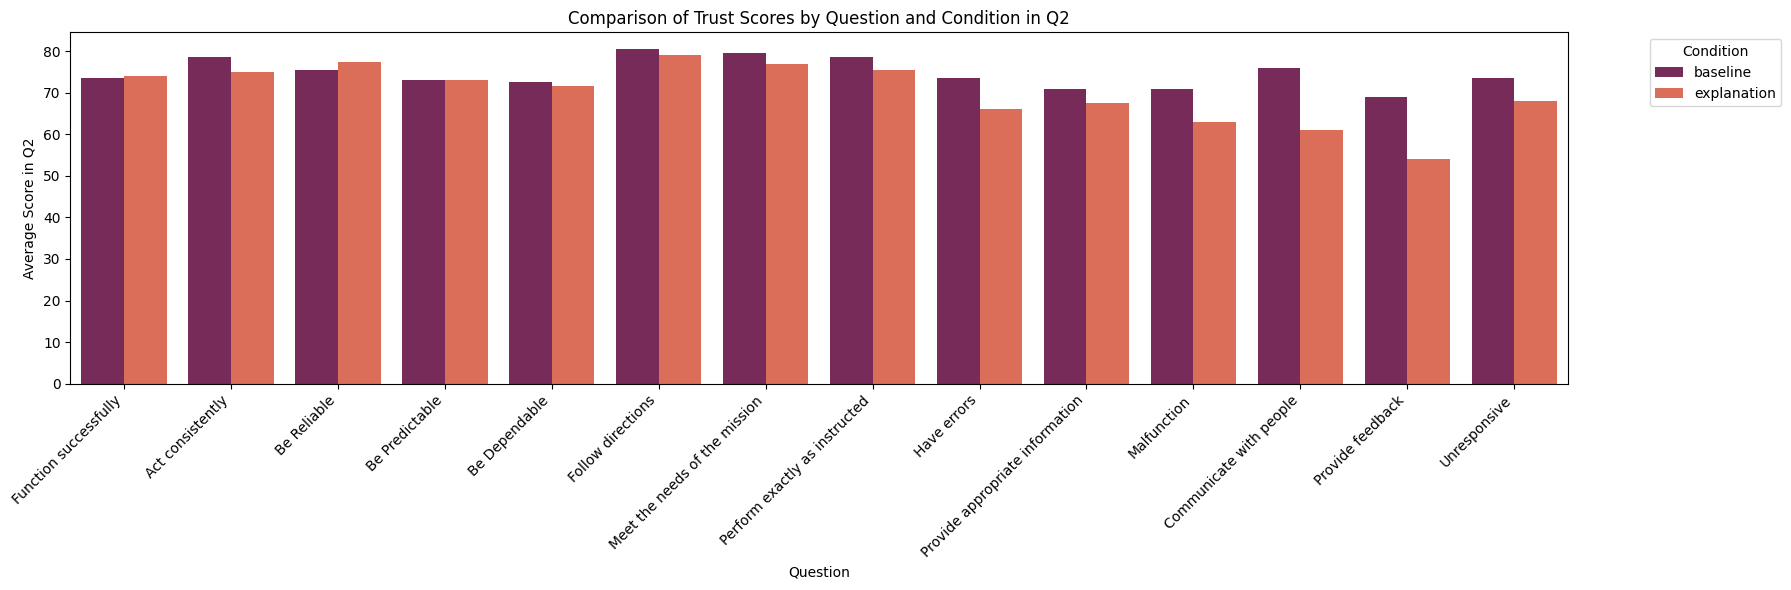

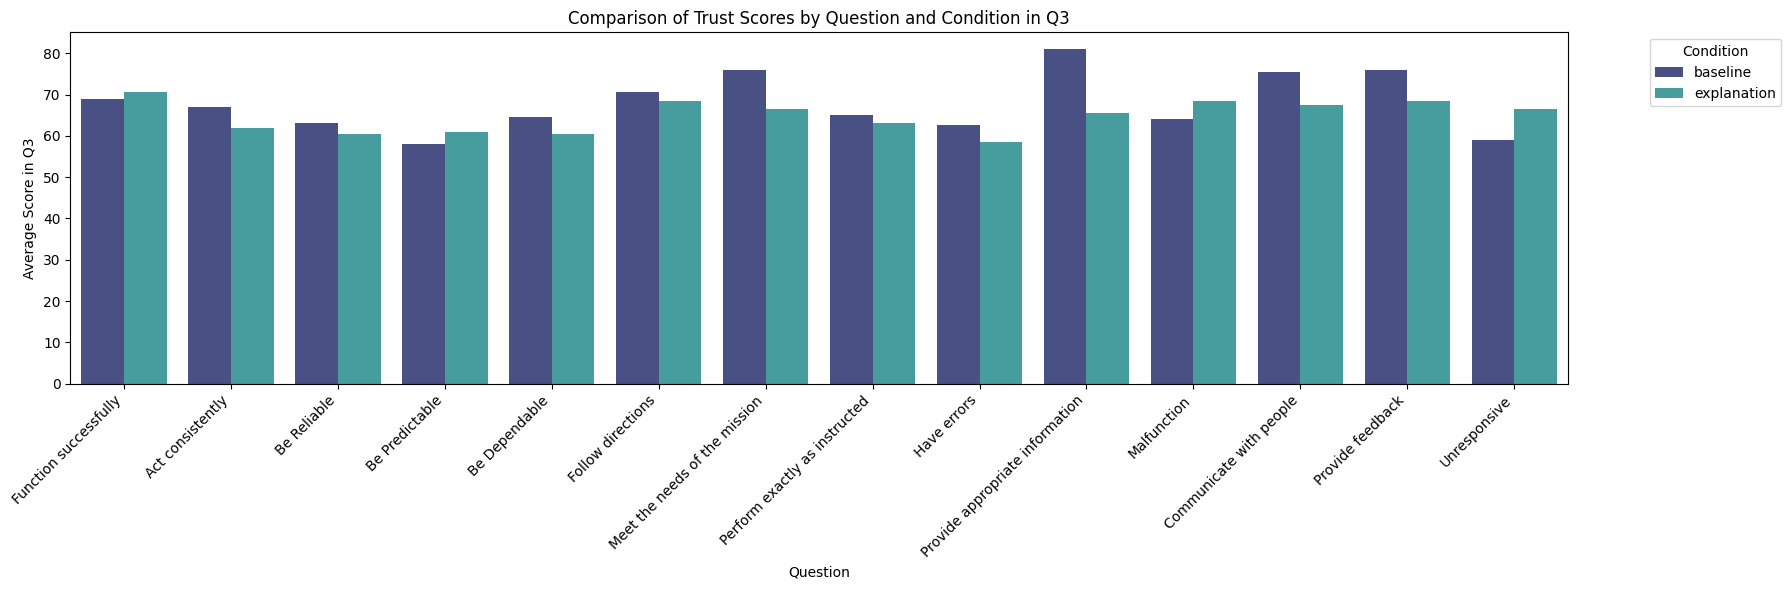

In [21]:
question_labels = {
    "1": "Function successfully",
    "2": "Act consistently",
    "3": "Be Reliable",
    "4": "Be Predictable",
    "5": "Be Dependable",
    "6": "Follow directions",
    "7": "Meet the needs of the mission",
    "8": "Perform exactly as instructed",
    "9": "Have errors",
    "10": "Provide appropriate information",
    "11": "Malfunction",
    "12": "Communicate with people",
    "13": "Provide feedback",
    "14": "Unresponsive"
}

questions = [str(i) for i in range(1, 15)]  

q2_means = q2_df.groupby(["GROUP", "Condition"])[questions].mean().rename(columns=lambda x: f"Q3_{x}")
melted_df2 = q2_means.reset_index().melt(id_vars=["GROUP", "Condition"], 
                                         value_vars=[f"Q3_{q}" for q in questions],
                                         var_name="Question", 
                                         value_name="Score")

melted_df2["Question"] = melted_df2["Question"].str.replace("Q3_", "").map(question_labels)

# 
plt.figure(figsize=(18, 6))  
sns.barplot(data=melted_df2, x="Question", y="Score", hue="GROUP", dodge=True, palette="rocket")

plt.xlabel("Question")
plt.ylabel("Average Score in Q2")
plt.title("Comparison of Trust Scores by Question and Condition in Q2")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and alignment

plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#----------------------

q3_means = q3_df.groupby(["GROUP", "Condition"])[questions].mean().rename(columns=lambda x: f"Q3_{x}")
melted_df = q3_means.reset_index().melt(id_vars=["GROUP", "Condition"], 
                                         value_vars=[f"Q3_{q}" for q in questions],
                                         var_name="Question", 
                                         value_name="Score")

melted_df["Question"] = melted_df["Question"].str.replace("Q3_", "").map(question_labels)

# 
plt.figure(figsize=(18, 6))  # Increased figure size for more space
sns.barplot(data=melted_df, x="Question", y="Score", hue="GROUP", dodge=True, palette="mako")

plt.xlabel("Question")
plt.ylabel("Average Score in Q3")
plt.title("Comparison of Trust Scores by Question and Condition in Q3")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust rotation and alignment

plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

         GROUP           Measure  Change
0     baseline  Integrity Change    -1.0
1  explanation  Integrity Change    -2.5
2     baseline       Team Change    -2.5
3  explanation       Team Change     2.0


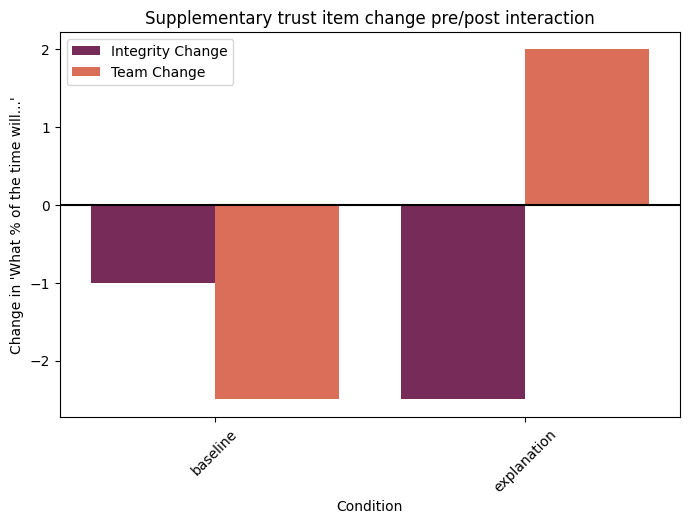

In [164]:
#15. integrity
#16. part of team


q3_df["Integrity Change"] = q3_df["15"] - q2_df["15"]
q3_df["Team Change"] = q3_df["16"] - q2_df["16"]

grouped = q3_df.groupby("GROUP")[["Integrity Change", "Team Change"]].mean().reset_index()

grouped_melted = grouped.melt(id_vars="GROUP", var_name="Measure", value_name="Change")

print(grouped_melted)

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_melted, x="GROUP", y="Change", hue="Measure", palette="rocket")
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

plt.xlabel("Condition")
plt.ylabel("Change in 'What % of the time will...'")
plt.title("Supplementary trust item change pre/post interaction")
plt.xticks(rotation=45)
plt.legend(title="")

plt.show()


In [165]:
#Wilcoxon rank sum tests

# grouped = q3_df.groupby("GROUP")[["Integrity Change", "Team Change"]].mean().reset_index()

# grouped_melted = grouped.melt(id_vars="GROUP", var_name="Measure", value_name="Change")
baseline_q2 = q2_df.loc[q2_df["GROUP"] == "baseline"]
baseline_q3 = q3_df.loc[q3_df["GROUP"] == "baseline"]
explanation_q2 = q2_df.loc[q2_df["GROUP"] == "explanation"]
explanation_q3 = q3_df.loc[q3_df["GROUP"] == "explanation"]

icb = (baseline_q2["16"] - baseline_q3["15"]).mean()
ice = (explanation_q2["16"] - explanation_q3["15"]).mean()

print(icb, ice)


res = wilcoxon(icb, ice)
print(res)

14.5 8.0
WilcoxonResult(statistic=0.0, pvalue=1.0)


In [24]:
# ddf = diff_df.T.drop('ID', axis=0)

# avg = ddf.mean(axis=1)
# std_dev = ddf.std(axis=1)
# fig, ax = plt.subplots(figsize=(15, 5))
# plt.errorbar(avg.index, avg, yerr=std_dev, fmt='-o', color='blue', ecolor='red', capsize=4)

# plt.xlabel("Question")
# plt.ylabel("Average Difference")
# plt.title("Schaefer Trust Questionnaire Average Scoring Difference (Explanation)")

# plt.grid(True)
# plt.tight_layout()
# plt.show()

# ddf
# avg

In [166]:
#gators vs trust score?
#avg score before vs after breaking
nag_df['before'] = nag_df[['1','2','3','4']].mean(axis=1)
nag_df['after'] = nag_df[['6','7','8','9']].mean(axis=1)

print(nag_df[nag_df['GROUP'] == 'baseline']['before'].mean())
print(nag_df[nag_df['GROUP'] == 'baseline']['after'].mean())
print("-----------------------")
print(nag_df[nag_df['GROUP'] == 'explanation']['before'].mean())
print(nag_df[nag_df['GROUP'] == 'explanation']['after'].mean())

7.802631578947368
6.9605263157894735
-----------------------
7.7625
6.6125


In [167]:
nag_df['change'] = nag_df['after'] - nag_df['before']

# Extract change scores for each group
baseline_change = nag_df[nag_df['GROUP'] == 'baseline']['change']
explanation_change = nag_df[nag_df['GROUP'] == 'explanation']['change']

# Independent t-test (assumes normality)
ind_ttest = ttest_ind(baseline_change, explanation_change, equal_var=False)  # Welch’s t-test

# Mann-Whitney U test (for non-normal data)
mann_whitney = mannwhitneyu(baseline_change, explanation_change, alternative='two-sided')

print("Independent t-test (difference in change scores between groups):")
print(f"t-statistic: {ind_ttest.statistic}, p-value: {ind_ttest.pvalue}")

print("\nMann-Whitney U test (non-parametric alternative):")
print(f"U-statistic: {mann_whitney.statistic}, p-value: {mann_whitney.pvalue}")


Independent t-test (difference in change scores between groups):
t-statistic: 0.6447822558364756, p-value: 0.523201240856634

Mann-Whitney U test (non-parametric alternative):
U-statistic: 212.5, p-value: 0.5357760479951592


In [168]:
#remove attention check questions
q1_df = q1_df.drop(['21', '22'], axis=1)
q1_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,GROUP,ID
0,6,6,6,6,6,5,5,5,5,6,...,5,5,5,5,5,6,5,5,baseline,6511f1490c9df9f8c7890e
1,7,7,7,7,7,2,2,1,2,1,...,5,4,6,4,2,4,5,4,baseline,6786147b9a47af07bf5559cf
2,6,5,6,6,5,1,2,1,1,3,...,7,7,7,3,1,2,4,4,baseline,5acb4b2ffa3b4e000173aa2c
3,6,6,5,4,7,6,5,3,3,7,...,7,7,6,7,7,5,7,6,baseline,613cb52db0f1cb2262bbf5d
4,5,5,5,7,6,1,1,2,1,3,...,7,7,7,2,3,2,4,5,baseline,5e60f63ee6385a000bcbffc9
5,6,6,4,3,3,2,2,2,2,3,...,7,6,7,6,3,5,5,6,baseline,67d8270aba9f1c19f16caa6c
6,6,5,6,7,7,2,2,1,1,1,...,6,6,7,3,3,2,4,2,baseline,666208dc57b332c5dbcaac25
7,5,6,5,6,6,2,4,4,2,4,...,7,7,7,7,7,7,7,6,baseline,6081728972120aa7f9685791
8,5,6,4,4,3,5,5,5,4,5,...,4,5,3,5,4,4,6,4,baseline,5f6c8c79d4da200436bf03f7
9,5,5,5,5,4,2,2,2,2,4,...,7,7,6,2,2,2,3,5,baseline,602af15577ccb71f741bef0b


In [169]:
#subscales
#Personal Level Positive Attitude (P+) [1-5]
q1_df["P+"] = q1_df["1"] + q1_df["2"] + q1_df["3"] + q1_df["4"] + q1_df["5"]
#Personal Level Negative Attitude (P-) [6-10]
q1_df["P-"] = q1_df["6"] + q1_df["7"] + q1_df["8"] + q1_df["9"] + q1_df["10"]
#Societal Level Positive Attitude (S+) [11-15]
q1_df["S+"] = q1_df["11"] + q1_df["12"] + q1_df["13"] + q1_df["14"] + q1_df["15"]
#Societal Level Negative Attitude (S-) [16-20]
q1_df["S-"] = q1_df["16"] + q1_df["17"] + q1_df["18"] + q1_df["19"] + q1_df["20"]

q1_df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,GROUP,ID,P+,P-,S+,S-
0,6,6,6,6,6,5,5,5,5,6,...,5,6,5,5,baseline,6511f1490c9df9f8c7890e,30,26,28,26
1,7,7,7,7,7,2,2,1,2,1,...,2,4,5,4,baseline,6786147b9a47af07bf5559cf,35,8,23,19
2,6,5,6,6,5,1,2,1,1,3,...,1,2,4,4,baseline,5acb4b2ffa3b4e000173aa2c,28,8,35,14
3,6,6,5,4,7,6,5,3,3,7,...,7,5,7,6,baseline,613cb52db0f1cb2262bbf5d,28,24,34,32
4,5,5,5,7,6,1,1,2,1,3,...,3,2,4,5,baseline,5e60f63ee6385a000bcbffc9,28,8,35,16
5,6,6,4,3,3,2,2,2,2,3,...,3,5,5,6,baseline,67d8270aba9f1c19f16caa6c,22,11,33,25
6,6,5,6,7,7,2,2,1,1,1,...,3,2,4,2,baseline,666208dc57b332c5dbcaac25,31,7,32,14
7,5,6,5,6,6,2,4,4,2,4,...,7,7,7,6,baseline,6081728972120aa7f9685791,28,16,35,34
8,5,6,4,4,3,5,5,5,4,5,...,4,4,6,4,baseline,5f6c8c79d4da200436bf03f7,22,24,20,23
9,5,5,5,5,4,2,2,2,2,4,...,2,2,3,5,baseline,602af15577ccb71f741bef0b,24,12,32,14


In [171]:
#correlation between nag score change and schaefer? demo? 

nag_df['before']

0      9.75
1      6.25
2      7.00
3      2.50
4      6.00
5     10.00
6      8.75
7      7.50
8      9.25
9      8.75
10     7.00
11    10.00
12     9.50
13     8.00
14     8.00
15     8.00
16     8.75
17     5.00
18     8.25
19     7.50
20     5.00
21    10.00
22     8.00
23     5.00
24     9.00
25     6.75
26     7.25
27     9.25
28     8.50
29     7.50
30     7.00
31     8.25
32    10.00
33     8.25
34     9.25
35     7.50
36     7.75
37     7.00
38     6.50
Name: before, dtype: float64

In [ ]:
#diff between nag score change between conditions

In [134]:
# numeric_cols = diff_df.select_dtypes(include=['number']).columns

# # Compute row-wise sum of differences and add as a new column
# diff_df["Overall Difference"] = diff_df[numeric_cols].sum(axis=1)

# # Set ID as index for visualization
# diff_df.set_index("ID", inplace=True)

# # Plot a heatmap of differences
# plt.figure(figsize=(12, 6))
# sns.heatmap(diff_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".0f")

# plt.title("Difference in Percentages Between Two DataFrames")
# plt.xlabel("Questions")
# plt.ylabel("Participants (ID)")
# plt.show()


In [214]:
# numeric_cols = diff_df.select_dtypes(include=['number']).columns.tolist()

# diff_df["Overall Difference"] = diff_df[numeric_cols].sum(axis=1)  # Raw difference

# max_possible_diff = len(numeric_cols) * 100  # Maximum possible sum of differences
# diff_df["Overall Difference (%)"] = (diff_df["Overall Difference"] / max_possible_diff) * 100

# diff_df['ID'] = diff_df.index
# diff_df.set_index("ID", inplace=True)

# plt.figure(figsize=(12, 6))

# for idx, row in diff_df.iterrows():
#     plt.plot(diff_df["Overall Difference (%)"], label=f"Participant {idx}", marker='o')

# # Add labels and title
# plt.xlabel("Question Numbers")
# plt.ylabel("Difference in Percentages")
# plt.title("Overall Difference in Percentages for Each Participant")
# plt.legend(title="Participants", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# print(diff_df[['Overall Difference (%)']])


In [213]:
# unique_ids = log_df["ID"].unique()

# for pid in unique_ids:
#     fig, ax = plt.subplots(figsize=(8, 6))

#     df_subset = log_df[log_df["ID"] == pid]

#     ax.plot(df_subset["player_x"], df_subset["player_y"], '-', label="Player Path")
#     ax.plot(df_subset["robot_x"], df_subset["robot_y"], '-', label="Robot Path")

#     ax.set_xlabel("X Position")
#     ax.set_ylabel("Y Position")
#     ax.set_title(f"Player and Robot Movement for ID: {pid}")
#     ax.legend()
#     ax.grid(True)

#     plt.show()